In [1]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
from time import time
import pandas
import traceback

import matplotlib.pyplot as plt
import numpy as np
import cv2
from shapely.geometry import Polygon, MultiPolygon, LineString, GeometryCollection, Point, MultiPoint
from shapely.affinity import translate

from catch_converter.parse_contours import parse_cvi42ws
from LazyLuna.Mini_LL import *
from LazyLuna.utils import *
from LazyLuna.Figures import *
from LazyLuna.Views import *

In [6]:
# basepaths
bp        = '/Users/dietrichhadler/Desktop/Daten/Atria_Hadil'
bp_annos  = '/Users/dietrichhadler/Desktop/Daten/Atria_Hadil/AI'
bp_cases  = '/Users/dietrichhadler/Desktop/Daten/Atria_Hadil/Cases'
bp_imgs   = '/Users/dietrichhadler/Desktop/Daten/Atria_Hadil/Imgs'

bp        = '/Users/dietrichhadler/Desktop/Daten/Atria_Intra'
bp_annos  = '/Users/dietrichhadler/Desktop/Daten/Atria_Intra/HaOne'
bp_cases  = '/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Cases'
bp_imgs   = '/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Imgs'

In [ ]:
parse_cvi42ws(bp_annos, bp_annos, process=True, debug=False)

In [7]:
lax_cine_view = LAX_CINE_View()
cases = []

# get the paths of imgs and annotations via SeriesInstanceUIDs
paths = get_imgs_and_annotation_paths(bp_imgs, bp_annos)
print(paths)
for imgp, annop in paths:
    #if not '1.3.12.2.1107.5.2.43.167071.30000021082405410237400000007' in annop: continue
    try:
        print(imgp, annop)
        st = time()
        case = Case(imgp, annop, os.path.basename(imgp), os.path.basename(bp_annos))
        case = lax_cine_view.initialize_case(case)
        case.store(bp_cases)
        cases.append(case)
        print('Case customization took: ', time()-st, 'Case: ', case.reader_name, case.case_name)
    except Exception as e:
        print('Failed at: ', imgp, annop, ' , Exception: ', e)
        print(traceback.format_exc())
    print()

[('/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Imgs/Atria_HCM_24_', '/Users/dietrichhadler/Desktop/Daten/Atria_Intra/HaOne/1.3.6.1.4.1.53684.1.1.2.1955809981.5808.1655726131.43120'), ('/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Imgs/Atria_COV_31_', '/Users/dietrichhadler/Desktop/Daten/Atria_Intra/HaOne/1.3.6.1.4.1.53684.1.1.2.1955809981.5808.1655727316.84791'), ('/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Imgs/Atria_VOL_17_', '/Users/dietrichhadler/Desktop/Daten/Atria_Intra/HaOne/1.3.6.1.4.1.53684.1.1.2.1955809981.4572.1657189397.957'), ('/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Imgs/Atria_COV_32_', '/Users/dietrichhadler/Desktop/Daten/Atria_Intra/HaOne/1.3.6.1.4.1.53684.1.1.2.1955809981.5768.1657006519.2009'), ('/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Imgs/Atria_MD_4_', '/Users/dietrichhadler/Desktop/Daten/Atria_Intra/HaOne/1.3.6.1.4.1.53684.1.1.2.1955809981.5808.1655724961.5617'), ('/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Imgs/Atria_PSORCOR_40_', 

Case customization took:  5.054916858673096 Case:  HaOne Atria_MD_12_

/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Imgs/Atria_PSORCOR_36_(1) /Users/dietrichhadler/Desktop/Daten/Atria_Intra/HaOne/1.3.6.1.4.1.53684.1.1.2.1955809981.5768.1657013877.5314
Case customization took:  14.276689052581787 Case:  HaOne Atria_PSORCOR_36_(1)

/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Imgs/Atria_MD_11_ /Users/dietrichhadler/Desktop/Daten/Atria_Intra/HaOne/1.3.6.1.4.1.53684.1.1.2.1955809981.5808.1655725239.16642
Case customization took:  4.723749160766602 Case:  HaOne Atria_MD_11_

/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Imgs/Atria_PSORCOR_37_ /Users/dietrichhadler/Desktop/Daten/Atria_Intra/HaOne/1.3.6.1.4.1.53684.1.1.2.1955809981.5808.1655727514.88438
Case customization took:  10.116650104522705 Case:  HaOne Atria_PSORCOR_37_

/Users/dietrichhadler/Desktop/Daten/Atria_Intra/Imgs/Atria_MD_13_ /Users/dietrichhadler/Desktop/Daten/Atria_Intra/HaOne/1.3.6.1.4.1.53684.1.1.2.1955809981.580

In [8]:
cases = [pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in os.listdir(bp_cases)]
view  = LAX_CINE_View()
#cases = [view.customize_case(c) for c in cases if c.reader_name=='AI']
cases_tmp = []
for c in cases:
    try:
        cases_tmp.append(view.customize_case(c))
    except Exception as e: 
        print('Error: ', traceback.print_exc())
        continue
cases = cases_tmp
print('Nr Cases: ', len(cases))

Error:  None
Nr Cases:  57


Traceback (most recent call last):
  File "<ipython-input-8-ad90eca3a3b1>", line 7, in <module>
    cases_tmp.append(view.customize_case(c))
  File "/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Views.py", line 309, in customize_case
    case.attach_categories(
  File "/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Mini_LL.py", line 265, in attach_categories
    for c in categories: self.categories.append(c(self))
  File "/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Categories.py", line 365, in __init__
    super().__init__(case)
  File "/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Categories.py", line 236, in __init__
    self.set_nr_slices_phases()
  File "/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Categories.py", line 267, in set_nr_slices_phases
    self.nr_phases = max(dat, key=itemgetter(1))[1]+1
ValueError: max() arg is an empty sequence


In [24]:
cases1 = sorted([c for c in cases if c.reader_name=='HaOne'], key=lambda c:c.case_name)
cases2 = sorted([c for c in cases if c.reader_name=='HaTwo'], key=lambda c:c.case_name)
#cases1 = [cases1[0]]+cases1[2:]
for i in range(30):
    print(cases1[i].case_name, cases2[i].case_name)
print(len(cases1))
print(len(cases2))
ccs = [Case_Comparison(c1,c2) for c1,c2 in zip(cases1,cases2)]
print(len(ccs))

Atria_COV_31_ Atria_COV_31_
Atria_COV_32_ Atria_COV_33_
Atria_COV_33_ Atria_COV_34_
Atria_COV_34_ Atria_HCM_24_
Atria_HCM_24_ Atria_HCM_25_
Atria_HCM_25_ Atria_HCM_26_
Atria_HCM_26_ Atria_HCM_28_
Atria_HCM_28_ Atria_MD_11_
Atria_MD_11_ Atria_MD_12_
Atria_MD_12_ Atria_MD_13_
Atria_MD_13_ Atria_MD_14_
Atria_MD_14_ Atria_MD_3_
Atria_MD_3_ Atria_MD_4_
Atria_MD_4_ Atria_MD_9_
Atria_MD_9_ Atria_PSORCOR_36_(1)
Atria_PSORCOR_36_(1) Atria_PSORCOR_37_
Atria_PSORCOR_37_ Atria_PSORCOR_38_
Atria_PSORCOR_38_ Atria_PSORCOR_40_
Atria_PSORCOR_40_ Atria_PSORCOR_42_
Atria_PSORCOR_42_ Atria_TIPS_1_
Atria_TIPS_1_ Atria_TIPS_2_
Atria_TIPS_2_ Atria_TIPS_4_
Atria_TIPS_4_ Atria_VOL_15_
Atria_VOL_15_ Atria_VOL_16_
Atria_VOL_16_ Atria_VOL_17_
Atria_VOL_17_ Atria_VOL_18_
Atria_VOL_18_ Atria_VOL_21_
Atria_VOL_21_ Atria_VOL_22_


IndexError: list index out of range

In [36]:
cr_diffs = []
for cc in ccs:
    c1, c2 = cc.case1, cc.case2
    cr1, cr2 = c1.crs[0], c2.crs[0]
    cr_diffs.append(cr1.get_val_diff(cr2))
#print(cr_diffs)

import scipy.stats
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1+confidence)/2.0, n-1)
    return m, m-h, m+h

def confidence_interval(data):
    ci = 1.96*np.std(data)/np.sqrt(len(data))
    mean = np.mean(data)
    return mean, mean-ci, mean+ci


print(mean_confidence_interval(cr_diffs, 0.95))
print(confidence_interval(cr_diffs))
print(np.mean(cr_diffs), np.std(cr_diffs))

(0.9677341261833775, -0.44415173368950656, 2.3796199860562615)
(0.9677341261833775, -0.356659377512882, 2.292127629879637)
0.9677341261833775 3.57552637629572


In [14]:
ccs = ccs[3:5]
for cc in ccs:
    cc_table = LAX_CC_Metrics_Table()
    cc_table.calculate(cc)
    print(cc.case1.case_name)
    for cname in ['la', 'ra']: 
        cc_table.present_contour_df(cname, pretty=False)
        display(cc_table.df)

Atria_HCM_24_


/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Tables.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.metric_vals.sort_values(by='slice', axis=0, ascending=True, inplace=True, ignore_index=True)


,slice,LAX 4CV LAES ml diff,LAX 4CV LAED ml diff,LAX 2CV LAES ml diff,LAX 2CV LAED ml diff,LAX 4CV LAES abs ml diff,LAX 4CV LAED abs ml diff,LAX 2CV LAES abs ml diff,LAX 2CV LAED abs ml diff,LAX 4CV LAES DSC,...,LAX 2CV LAES HD,LAX 2CV LAED HD,LAX 4CV LAES has_contour1,LAX 4CV LAED has_contour1,LAX 2CV LAES has_contour1,LAX 2CV LAED has_contour1,LAX 4CV LAES has_contour2,LAX 4CV LAED has_contour2,LAX 2CV LAES has_contour2,LAX 2CV LAED has_contour2
0,0,-0.631494,-0.213574,0.489111,0.394189,0.631494,0.213574,0.489111,0.394189,94.446544,...,1.75,3.132491,True,True,True,True,True,True,True,True


,slice,LAX 4CV RAES ml diff,LAX 4CV RAED ml diff,LAX 4CV RAES abs ml diff,LAX 4CV RAED abs ml diff,LAX 4CV RAES DSC,LAX 4CV RAED DSC,LAX 4CV RAES HD,LAX 4CV RAED HD,LAX 4CV RAES has_contour1,LAX 4CV RAED has_contour1,LAX 4CV RAES has_contour2,LAX 4CV RAED has_contour2
0,0,0.384961,-0.250602,0.384961,0.250602,96.409513,96.568927,1.472304,2.136001,True,True,True,True


/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Tables.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.metric_vals.sort_values(by='slice', axis=0, ascending=True, inplace=True, ignore_index=True)


Atria_HCM_25_


,slice,LAX 4CV LAES ml diff,LAX 4CV LAED ml diff,LAX 2CV LAES ml diff,LAX 2CV LAED ml diff,LAX 4CV LAES abs ml diff,LAX 4CV LAED abs ml diff,LAX 2CV LAES abs ml diff,LAX 2CV LAED abs ml diff,LAX 4CV LAES DSC,...,LAX 2CV LAES HD,LAX 2CV LAED HD,LAX 4CV LAES has_contour1,LAX 4CV LAED has_contour1,LAX 2CV LAES has_contour1,LAX 2CV LAED has_contour1,LAX 4CV LAES has_contour2,LAX 4CV LAED has_contour2,LAX 2CV LAES has_contour2,LAX 2CV LAED has_contour2
0,0,0.369834,0.206966,0.022931,-0.302806,0.369834,0.206966,0.022931,0.302806,94.317138,...,1.59099,3.132491,True,True,True,True,True,True,True,True


,slice,LAX 4CV RAES ml diff,LAX 4CV RAED ml diff,LAX 4CV RAES abs ml diff,LAX 4CV RAED abs ml diff,LAX 4CV RAES DSC,LAX 4CV RAED DSC,LAX 4CV RAES HD,LAX 4CV RAED HD,LAX 4CV RAES has_contour1,LAX 4CV RAED has_contour1,LAX 4CV RAES has_contour2,LAX 4CV RAED has_contour2
0,0,-0.342788,0.113479,0.342788,0.113479,95.663043,96.758554,2.210202,1.520691,True,True,True,True


In [18]:
for cc in ccs:
    print(cc.case1.case_name)
    for cat in cc.case1.categories: print(cat.name, cat.phase, end=', ')
    print()
    for cat in cc.case2.categories: print(cat.name, cat.phase, end=', ')
    print()
    for p in range(cc.case1.categories[0].nr_phases):
        anno = cc.case1.categories[0].get_anno(0,p)
        if len(anno.available_contour_names())==0: continue
        print(p, anno.available_contour_names())
    #break

NICK-20220328_140152
LAX 4CV LAES 1, LAX 4CV LAED 17, LAX 4CV RAES 1, LAX 4CV RAED 16, LAX 2CV LAES 1, LAX 2CV LAED 17, 
LAX 4CV LAES 29, LAX 4CV LAED 13, LAX 4CV RAES 27, LAX 4CV RAED 10, LAX 2CV LAES 29, LAX 2CV LAED 13, 
1 ['ra', 'la']
16 ['ra']
17 ['la']
NICK-20220401_120259
LAX 4CV LAES 1, LAX 4CV LAED 12, LAX 4CV RAES 0, LAX 4CV RAED 11, LAX 2CV LAES 1, LAX 2CV LAED 12, 
LAX 4CV LAES 29, LAX 4CV LAED 11, LAX 4CV RAES 27, LAX 4CV RAED 10, LAX 2CV LAES 29, LAX 2CV LAED 11, 
0 ['ra']
1 ['la']
10 ['ra']
11 ['ra']
12 ['la']


/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Mini_LL.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  lv_ext1, lv_ext2, apex = scale(extent, xfact=pw, yfact=ph)
/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Mini_LL.py:109: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  lv_ext1, lv_ext2, apex = scale(extent, xfact=pw, yfact=ph)


,case_name,4CV_RAESAREA_avg,4CV_RAEDAREA_avg,4CV_RAESV_avg,4CV_RAEDV_avg,4CV_LAESAREA_avg,4CV_LAEDAREA_avg,4CV_LAESV_avg,4CV_LAEDV_avg,2CV_LAESAREA_avg,...,2CV_LAESV_diff,2CV_LAEDV_diff,BIPLANE_LAESV_diff,BIPLANE_LAEDV_diff,LAESP_4CV_diff,LAEDP_4CV_diff,LAESP_2CV_diff,LAEDP_2CV_diff,RAESP_4CV_diff,RAEDP_4CV_diff
0,NICK-20220328_140152,30.467422,33.798477,NaN,NaN,22.523346,24.450073,NaN,NaN,25.092224,...,NaN,NaN,NaN,NaN,2,4,2,4,4,6
1,NICK-20220401_120259,14.295315,21.434398,NaN,NaN,10.771770,20.049724,NaN,NaN,12.100474,...,NaN,NaN,NaN,NaN,2,1,2,1,3,1


Columns:  Index(['slice', 'la LAX 4CV LAES ml diff', 'la LAX 4CV LAED ml diff',
       'la LAX 2CV LAES ml diff', 'la LAX 2CV LAED ml diff',
       'la LAX 4CV LAES abs ml diff', 'la LAX 4CV LAED abs ml diff',
       'la LAX 2CV LAES abs ml diff', 'la LAX 2CV LAED abs ml diff',
       'la LAX 4CV LAES DSC', 'la LAX 4CV LAED DSC', 'la LAX 2CV LAES DSC',
       'la LAX 2CV LAED DSC', 'la LAX 4CV LAES HD', 'la LAX 4CV LAED HD',
       'la LAX 2CV LAES HD', 'la LAX 2CV LAED HD',
       'la LAX 4CV LAES has_contour1', 'la LAX 4CV LAED has_contour1',
       'la LAX 2CV LAES has_contour1', 'la LAX 2CV LAED has_contour1',
       'la LAX 4CV LAES has_contour2', 'la LAX 4CV LAED has_contour2',
       'la LAX 2CV LAES has_contour2', 'la LAX 2CV LAED has_contour2',
       'ra LAX 4CV RAES ml diff', 'ra LAX 4CV RAED ml diff',
       'ra LAX 4CV RAES abs ml diff', 'ra LAX 4CV RAED abs ml diff',
       'ra LAX 4CV RAES DSC', 'ra LAX 4CV RAED DSC', 'ra LAX 4CV RAES HD',
       'ra LAX 4CV RAED HD', 'r

/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Tables.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.metric_vals.sort_values(by='slice', axis=0, ascending=True, inplace=True, ignore_index=True)


,Case,Reader1,Reader2,slice,la LAX 4CV LAES ml diff,la LAX 4CV LAED ml diff,la LAX 2CV LAES ml diff,la LAX 2CV LAED ml diff,la LAX 4CV LAES abs ml diff,la LAX 4CV LAED abs ml diff,...,ra LAX 4CV RAES abs ml diff,ra LAX 4CV RAED abs ml diff,ra LAX 4CV RAES DSC,ra LAX 4CV RAED DSC,ra LAX 4CV RAES HD,ra LAX 4CV RAED HD,ra LAX 4CV RAES has_contour1,ra LAX 4CV RAED has_contour1,ra LAX 4CV RAES has_contour2,ra LAX 4CV RAED has_contour2
0,NICK-20220328_140152,NI,AI,0,2.327234,1.819336,0.023071,2.013629,2.327234,1.819336,...,0.016315,0.717023,95.067133,92.143040,1.875000,4.331029,True,True,True,True
1,NICK-20220401_120259,NI,AI,0,0.848297,1.144047,0.795416,0.533766,0.848297,1.144047,...,1.447881,0.567540,79.043102,95.749571,5.692649,1.625000,True,True,True,True


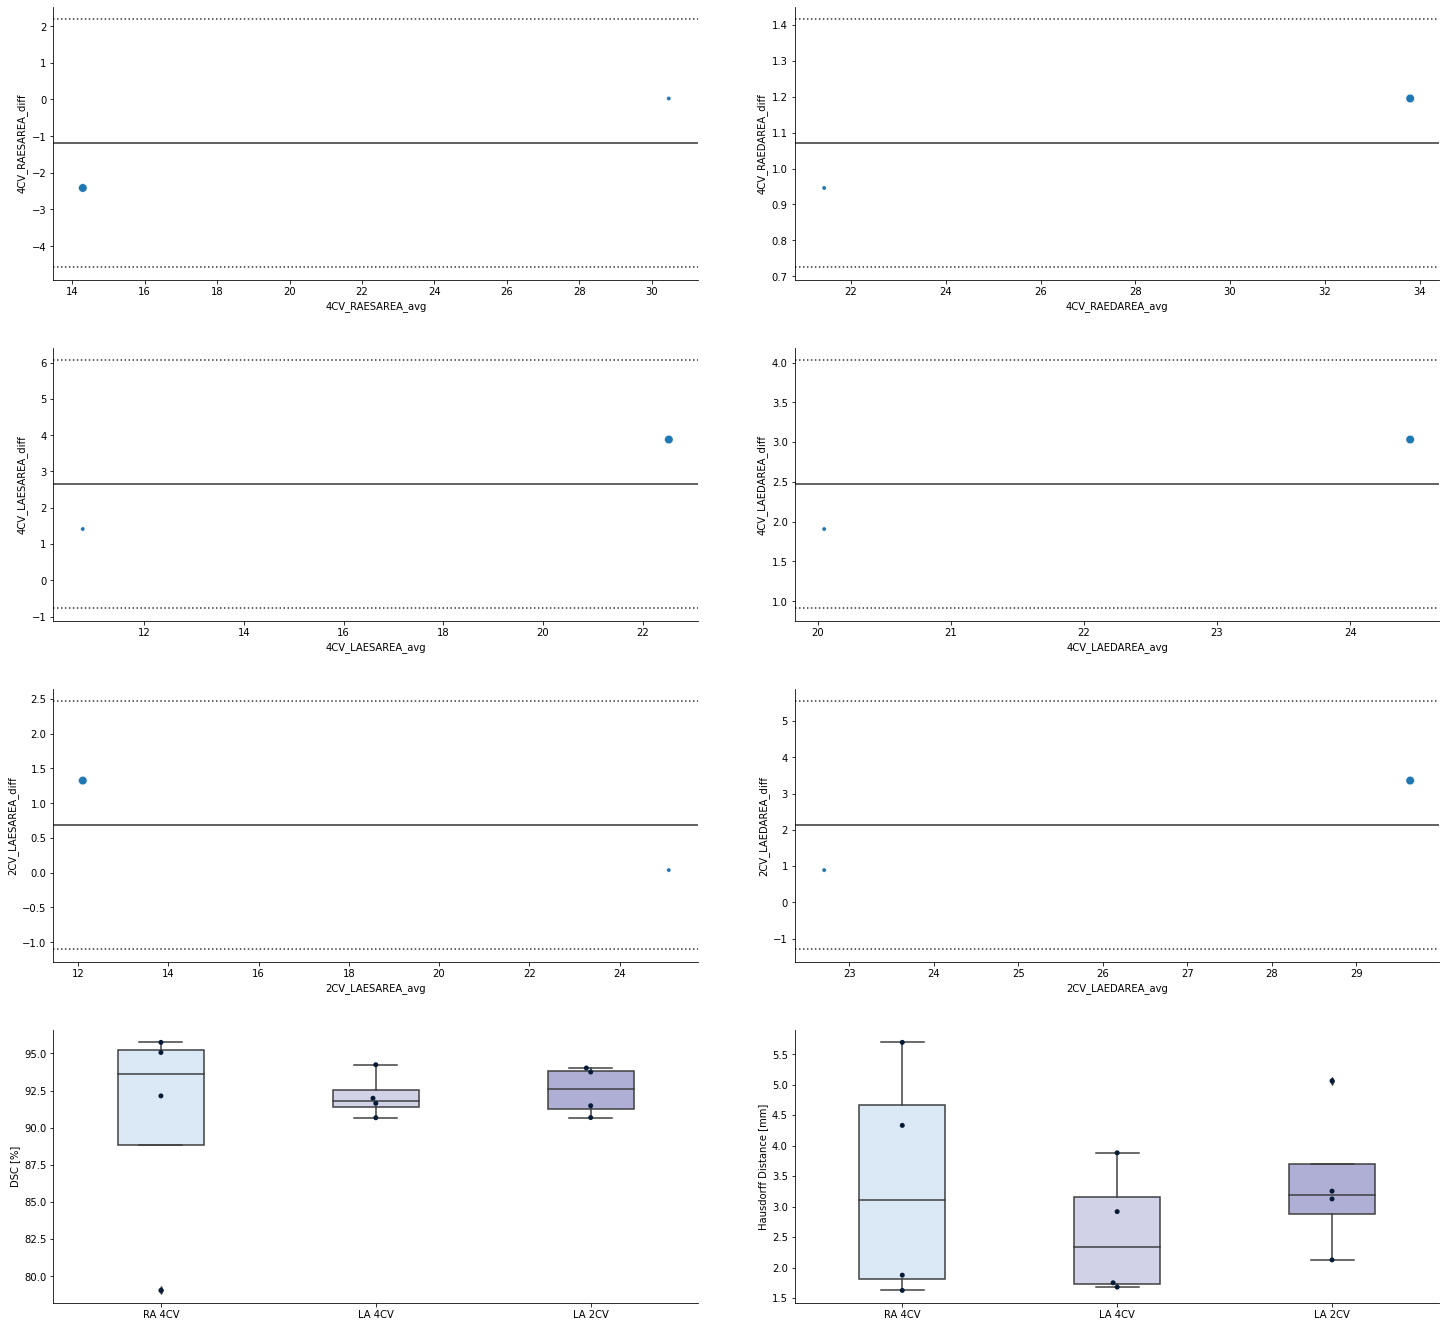

In [19]:
#ccs = [ccs[3]]
#print(ccs[0].case1.case_name)
def visualize(ccs):
    cases1   = [cc.case1 for cc in ccs]
    cases2   = [cc.case2 for cc in ccs]
    rows, columns   = 4, 2
    fig, axes = plt.subplots(rows, columns, figsize=(columns*11.0,rows*5.0))
    #self.set_size_inches(w=columns*11.0, h=(rows*6.0))
    #axes = self.subplots(rows, columns)
    custom_palette  = sns.color_palette("Blues")
    custom_palette2 = sns.color_palette("Purples")
    swarm_palette   = sns.color_palette(["#061C36", "#061C36"])
    
    cr_cols = ['case_name']+[cr.name+'_avg' for cr in ccs[0].case1.
                             crs]+[cr.name+'_diff' for cr in ccs[0].case1.crs]
    cr_rows = []
    for cc in ccs:
        row = [cc.case1.case_name]
        for cr1, cr2 in zip(cc.case1.crs, cc.case2.crs):
            row.append((cr1.get_val() + cr2.get_val())/ 2.0)
        for cr1, cr2 in zip(cc.case1.crs, cc.case2.crs):
            row.append(cr1.get_val_diff(cr2))
        cr_rows.append(row)
    cr_table = DataFrame(cr_rows, columns=cr_cols)
    
    display(cr_table)
    x_name, y_name = '4CV_RAESAREA_avg', '4CV_RAESAREA_diff'
    sns.scatterplot(ax=axes[0][0], x=x_name, y=y_name,
                    data=cr_table, markers='o', palette=swarm_palette, 
                    size=np.abs(cr_table[y_name]), s=10, legend=False)
    mean = cr_table[y_name].mean()
    std = cr_table[y_name].std()
    axes[0][0].axhline(mean, ls="-", c=".2")
    axes[0][0].axhline(mean+1.96*std, ls=":", c=".2")
    axes[0][0].axhline(mean-1.96*std, ls=":", c=".2")
    
    x_name, y_name = '4CV_RAEDAREA_avg', '4CV_RAEDAREA_diff'
    sns.scatterplot(ax=axes[0][1], x=x_name, y=y_name,
                    data=cr_table, markers='o', palette=swarm_palette, 
                    size=np.abs(cr_table[y_name]), s=10, legend=False)
    mean = cr_table[y_name].mean()
    std = cr_table[y_name].std()
    axes[0][1].axhline(mean, ls="-", c=".2")
    axes[0][1].axhline(mean+1.96*std, ls=":", c=".2")
    axes[0][1].axhline(mean-1.96*std, ls=":", c=".2")
    
    x_name, y_name = '4CV_LAESAREA_avg', '4CV_LAESAREA_diff'
    sns.scatterplot(ax=axes[1][0], x=x_name, y=y_name,
                    data=cr_table, markers='o', palette=swarm_palette, 
                    size=np.abs(cr_table[y_name]), s=10, legend=False)
    mean = cr_table[y_name].mean()
    std = cr_table[y_name].std()
    axes[1][0].axhline(mean, ls="-", c=".2")
    axes[1][0].axhline(mean+1.96*std, ls=":", c=".2")
    axes[1][0].axhline(mean-1.96*std, ls=":", c=".2")
    
    x_name, y_name = '4CV_LAEDAREA_avg', '4CV_LAEDAREA_diff'
    sns.scatterplot(ax=axes[1][1], x=x_name, y=y_name,
                    data=cr_table, markers='o', palette=swarm_palette, 
                    size=np.abs(cr_table[y_name]), s=10, legend=False)
    mean = cr_table[y_name].mean()
    std = cr_table[y_name].std()
    axes[1][1].axhline(mean, ls="-", c=".2")
    axes[1][1].axhline(mean+1.96*std, ls=":", c=".2")
    axes[1][1].axhline(mean-1.96*std, ls=":", c=".2")
    
    x_name, y_name = '2CV_LAESAREA_avg', '2CV_LAESAREA_diff'
    sns.scatterplot(ax=axes[2][0], x=x_name, y=y_name,
                    data=cr_table, markers='o', palette=swarm_palette, 
                    size=np.abs(cr_table[y_name]), s=10, legend=False)
    mean = cr_table[y_name].mean()
    std = cr_table[y_name].std()
    axes[2][0].axhline(mean, ls="-", c=".2")
    axes[2][0].axhline(mean+1.96*std, ls=":", c=".2")
    axes[2][0].axhline(mean-1.96*std, ls=":", c=".2")
    
    x_name, y_name = '2CV_LAEDAREA_avg', '2CV_LAEDAREA_diff'
    sns.scatterplot(ax=axes[2][1], x=x_name, y=y_name,
                    data=cr_table, markers='o', palette=swarm_palette, 
                    size=np.abs(cr_table[y_name]), s=10, legend=False)
    mean = cr_table[y_name].mean()
    std = cr_table[y_name].std()
    axes[2][1].axhline(mean, ls="-", c=".2")
    axes[2][1].axhline(mean+1.96*std, ls=":", c=".2")
    axes[2][1].axhline(mean-1.96*std, ls=":", c=".2")
    
    m_table = LAX_CCs_MetricsTable()
    m_table.calculate(ccs, LAX_CINE_View())
    display(m_table.df)
    
    ra_vals = m_table.df['ra LAX 4CV RAES DSC'].to_list() + m_table.df['ra LAX 4CV RAED DSC'].to_list()
    la4vals = m_table.df['la LAX 4CV LAES DSC'].to_list() + m_table.df['la LAX 4CV LAED DSC'].to_list()
    la2vals = m_table.df['la LAX 2CV LAES DSC'].to_list() + m_table.df['la LAX 2CV LAED DSC'].to_list()
    
    dicebp = sns.boxplot(ax=axes[3][0], data=[ra_vals,la4vals,la2vals], width=0.4)
    sns.swarmplot(ax=axes[3][0], data=[ra_vals,la4vals,la2vals], 
                  palette=swarm_palette, dodge=True)
    axes[3][0].set_xticklabels(['RA 4CV', 'LA 4CV', 'LA 2CV'])
    axes[3][0].set_ylabel('DSC [%]')
    
    for i, boxplot in enumerate(dicebp.artists):
        if i==0: boxplot.set_facecolor(custom_palette [i])
        else:    boxplot.set_facecolor(custom_palette2[i])
    
    ra_vals = m_table.df['ra LAX 4CV RAES HD'].to_list() + m_table.df['ra LAX 4CV RAED HD'].to_list()
    la4vals = m_table.df['la LAX 4CV LAES HD'].to_list() + m_table.df['la LAX 4CV LAED HD'].to_list()
    la2vals = m_table.df['la LAX 2CV LAES HD'].to_list() + m_table.df['la LAX 2CV LAED HD'].to_list()
    
    hd_bp = sns.boxplot(ax=axes[3][1], data=[ra_vals,la4vals,la2vals], width=0.4)
    sns.swarmplot(ax=axes[3][1], data=[ra_vals,la4vals,la2vals], 
                  palette=swarm_palette, dodge=True)
    axes[3][1].set_xticklabels(['RA 4CV', 'LA 4CV', 'LA 2CV'])
    axes[3][1].set_ylabel('Hausdorff Distance [mm]')
    
    for i, boxplot in enumerate(hd_bp.artists):
        if i==0: boxplot.set_facecolor(custom_palette [i])
        else:    boxplot.set_facecolor(custom_palette2[i])
    
    sns.despine()
    #self.subplots_adjust(left=0.075, bottom=0.05, right=0.95, top=0.95, wspace=0.15, hspace=0.25)
    fig.subplots_adjust(left=0.075, bottom=0.05, right=0.95, top=0.95, wspace=0.15, hspace=0.25)
    
visualize(ccs)

In [ ]:
print(ccs[0].case1.case_name)

for cat in ccs[0].case1.categories:
    print(cat.phase)


print(ccs[0].case1.categories)
print(ccs[0].case2.categories)

In [ ]:
case = [c for c in cases if '444' in c.case_name][0]
print('Case: ', case.case_name)

for cr in case.crs:
    print(cr.name, cr.get_val(string=True))

"""
cat = case.categories[0]
anno = cat.get_anno(0, 0)

print(anno.anno)

for p in range(cat.nr_phases):
    anno = cat.get_anno(0, p)
    print(p, anno.available_contour_names())
    print(p, anno.available_point_names())
    print(anno.length_LA())
    print(anno.length_RA())
#print(case.categories)
#for cr in c.crs:
#    print(cr.name, cr.get_val())
"""

In [ ]:
case = cases[0]
cats = case.categories
#print([c.name for c in cats if 'LAX 4CV' in c.name])
cat = [c for c in cats if 'LAX 4CV LAES' in c.name][0]
print(cat)
print(cat.phase)
for p in range(cat.nr_phases):
    print(cat.get_anno(0,p).anno.keys())
    if len(cat.get_anno(0,p).anno.keys())==0: continue
    img  = cat.get_img(0,p)
    anno = cat.get_anno(0,p)
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    ax.imshow(img, cmap='gray')
    anno.plot_all_contour_outlines(ax)
    plt.show()
    print()
    #break